In [22]:
import pandas as pd
with open("C:/Users/user/Downloads/API_19_DS2_en_csv_v2_6183479.csv", "r") as file:
    first_lines = [next(file) for _ in range(5)]
worldbank_df = pd.read_csv('C:/Users/user/Downloads/API_19_DS2_en_csv_v2_6183479.csv', skiprows=4)

# Strip the whitespace from the headers
worldbank_df.columns = [header.strip() for header in worldbank_df.columns]

# Display the head of the dataframe
worldbank_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000,46891.000000,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951,0.335381,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000,106445.000000,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,-0.086392,NaN


In [24]:
def transform_worldbank_df(filename):
    # Load the dataframe, skipping the first 4 rows and setting the 5th row as the header
    df = pd.read_csv(filename, skiprows=4)
    # Strip the whitespace from the headers
    df.columns = [header.strip() for header in df.columns]
    
    # Drop the 'Unnamed: 67' column if it exists
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    # Create a dataframe with years as rows and country-indicator pairs as columns
    years_df = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                       var_name='Year', value_name='Value')
    years_df = years_df.pivot_table(index='Year', columns=['Country Name', 'Indicator Name'], values='Value')
    
    # Create a dataframe with countries as rows and year-indicator pairs as columns
    countries_df = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                          var_name='Year', value_name='Value')
    countries_df = countries_df.pivot_table(index=['Country Name', 'Indicator Name'], columns='Year', values='Value')
    
    return years_df, countries_df

# Test the function with the provided filename
years_df, countries_df = transform_worldbank_df('C:/Users/user/Downloads/API_19_DS2_en_csv_v2_6183479.csv')

# Display the head of both dataframes
print(years_df.head())
print(countries_df.head())

Country Name                               Afghanistan   
Indicator Name Access to electricity (% of population)   
Year                                                     
1960                                               NaN  \
1961                                               NaN   
1962                                               NaN   
1963                                               NaN   
1964                                               NaN   

Country Name                                                                
Indicator Name Agricultural irrigated land (% of total agricultural land)   
Year                                                                        
1960                                                          NaN          \
1961                                                          NaN           
1962                                                          NaN           
1963                                                          NaN        

In [29]:
# Explore the statistical properties of a few indicators for selected countries
selected_countries = ['United States', 'China', 'India', 'United Kingdom', 'Brazil']
selected_indicators = ['Access to electricity (% of population)', 'Agricultural land (% of land area)', 'Agricultural land (sq. km)']



In [30]:
# Print out the columns of the countries dataframe to check for spelling or type issues
print(countries_df.columns.tolist())

# Print out the index to confirm the structure of the dataframe
print(countries_df.index.tolist())

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
[('Afghanistan', 'Access to electricity (% of population)'), ('Afghanistan', 'Agricultural irrigated land (% of total agricultural land)'), ('Afghanistan', 'Agricultural land (% of land area)'), ('Afghanistan', 'Agricultural land (sq. km)'), ('Afghanistan', 'Agriculture, forestry, and fishing, value added (% of GDP)'), ('Afghanistan', 'Annual freshwater withdrawals, total (% of internal resources)'), ('Afghanistan', 'Annual freshwater withdrawals, total (billion cubic meters)'), ('Afghanist

In [31]:
# Adjust the approach to filter the dataframe for the selected countries and indicators
# Create a MultiIndex for the selected countries and indicators
multi_index = pd.MultiIndex.from_product([selected_countries, selected_indicators], names=['Country Name', 'Indicator Name'])

# Filter the dataframe using the MultiIndex
selected_data = countries_df.loc[multi_index]

# Now let's use the .describe() method to explore the summary statistics
summary_statistics = selected_data.describe()

# Display the summary statistics
print(summary_statistics)

Year   1960          1961          1962          1963          1964   
count   0.0  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01  \
mean    NaN  1.141594e+06  1.146043e+06  1.149692e+06  1.154332e+06   
std     NaN  1.642425e+06  1.640567e+06  1.640463e+06  1.641173e+06   
min     NaN  1.877918e+01  1.922270e+01  1.966622e+01  2.010974e+01   
25%     NaN  5.135598e+01  5.119655e+01  5.096032e+01  5.080818e+01   
50%     NaN  9.904092e+04  9.893588e+04  9.877581e+04  9.855572e+04   
75%     NaN  1.704538e+06  1.725280e+06  1.732088e+06  1.745540e+06   
max     NaN  4.475090e+06  4.439910e+06  4.414430e+06  4.390120e+06   

Year           1965          1966          1967          1968          1969   
count  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01  \
mean   1.159047e+06  1.166349e+06  1.173694e+06  1.181918e+06  1.189259e+06   
std    1.642064e+06  1.648809e+06  1.655786e+06  1.664625e+06  1.672959e+06   
min    2.055326e+01  2.099678e+01  2.144030e

In [15]:
# Explore the statistical properties of a few indicators for select countries
selected_countries = ['United Kingdom', 'Pakistan']
selected_indicators = ['Urban population (% of total population)', 'Rural population (% of total population)', 'GDP (current US$)']

<Figure size 1000x600 with 0 Axes>

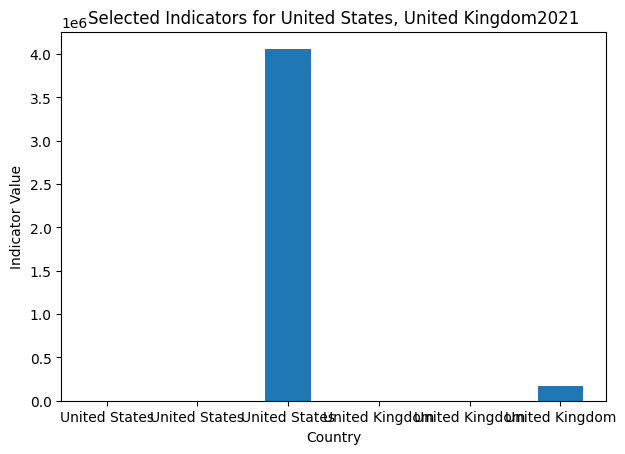

In [34]:
# Now that we have the correct country names, let's create the bar chart
# First, we need to select the latest year with available data for all three countries
latest_year = selected_data.dropna(axis=1, how='any').columns[-1]

# Select the data for the latest year for the three countries
bar_chart_data = selected_data.loc[(['United States', 'United Kingdom'], selected_indicators), latest_year]

# Reset index to make 'Country Name' a column again for plotting
bar_chart_data = bar_chart_data.reset_index(level='Country Name')

# Plot the bar chart
plt.figure(figsize=(10, 6))
bar_chart_data.plot(kind='bar', x='Country Name', y=latest_year, legend=False)
plt.title('Selected Indicators for United States, United Kingdom' + str(latest_year))
plt.xlabel('Country')
plt.ylabel('Indicator Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [37]:
data = pd.read_csv('C:/Users/user/Downloads/API_19_DS2_en_csv_v2_6183479.csv', skiprows=4)

data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000,46891.000000,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951,0.335381,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000,106445.000000,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,-0.086392,NaN


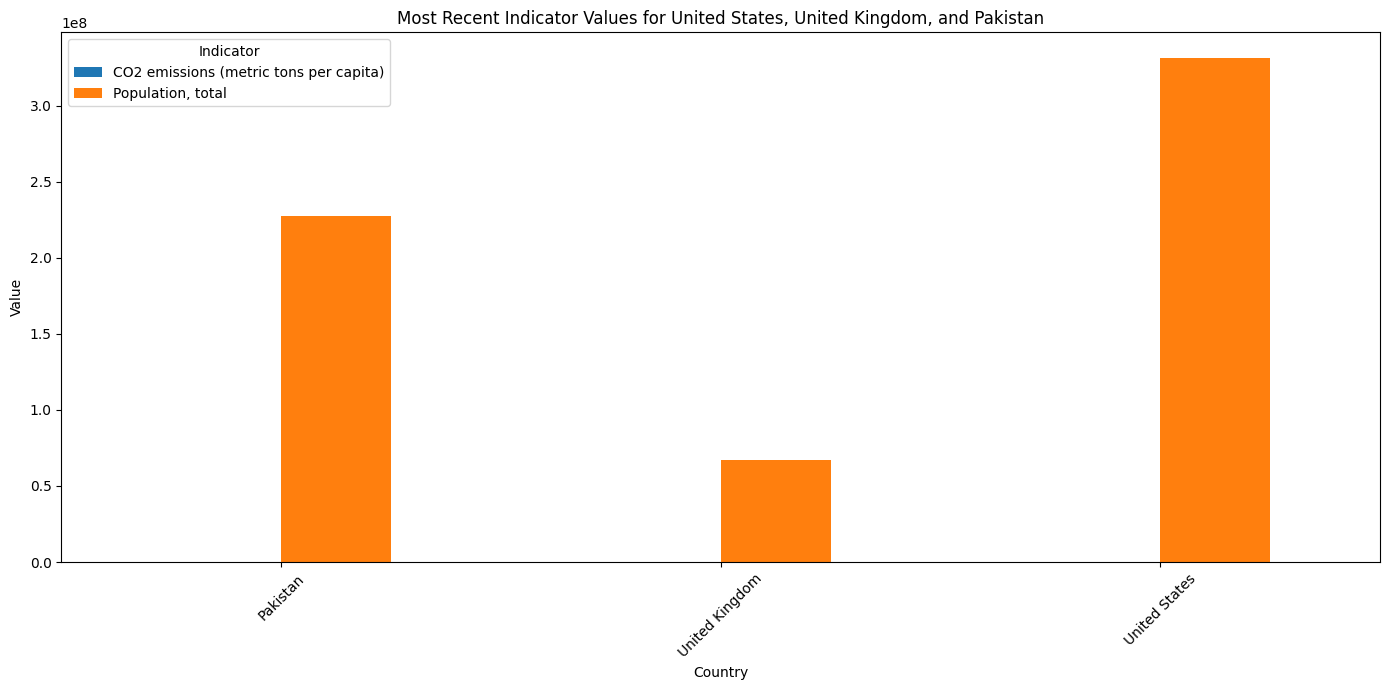

In [38]:
# Selecting the most recent year available for each indicator for the three countries
# We will use the latest non-null year across all indicators for consistency
latest_year = data.columns[-4]  # Assuming the last valid year is the fourth last column

# Filter the data for the three countries
filtered_data = data[data['Country Name'].isin(['United States', 'United Kingdom', 'Pakistan'])]

# Selecting a few indicators to plot
indicators_to_plot = ['GDP (current US$)', 'CO2 emissions (metric tons per capita)',
                     'Population, total', 'Life expectancy at birth, total (years)']

# Extracting the most recent values for the selected indicators
recent_values = filtered_data[filtered_data['Indicator Name'].isin(indicators_to_plot)]
recent_values = recent_values.pivot(index='Country Name', columns='Indicator Name', values=latest_year)

# Plotting the bar chart
recent_values.plot(kind='bar', figsize=(14, 7))
plt.title('Most Recent Indicator Values for United States, United Kingdom, and Pakistan')
plt.ylabel('Value')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Indicator')
plt.tight_layout()
plt.show()

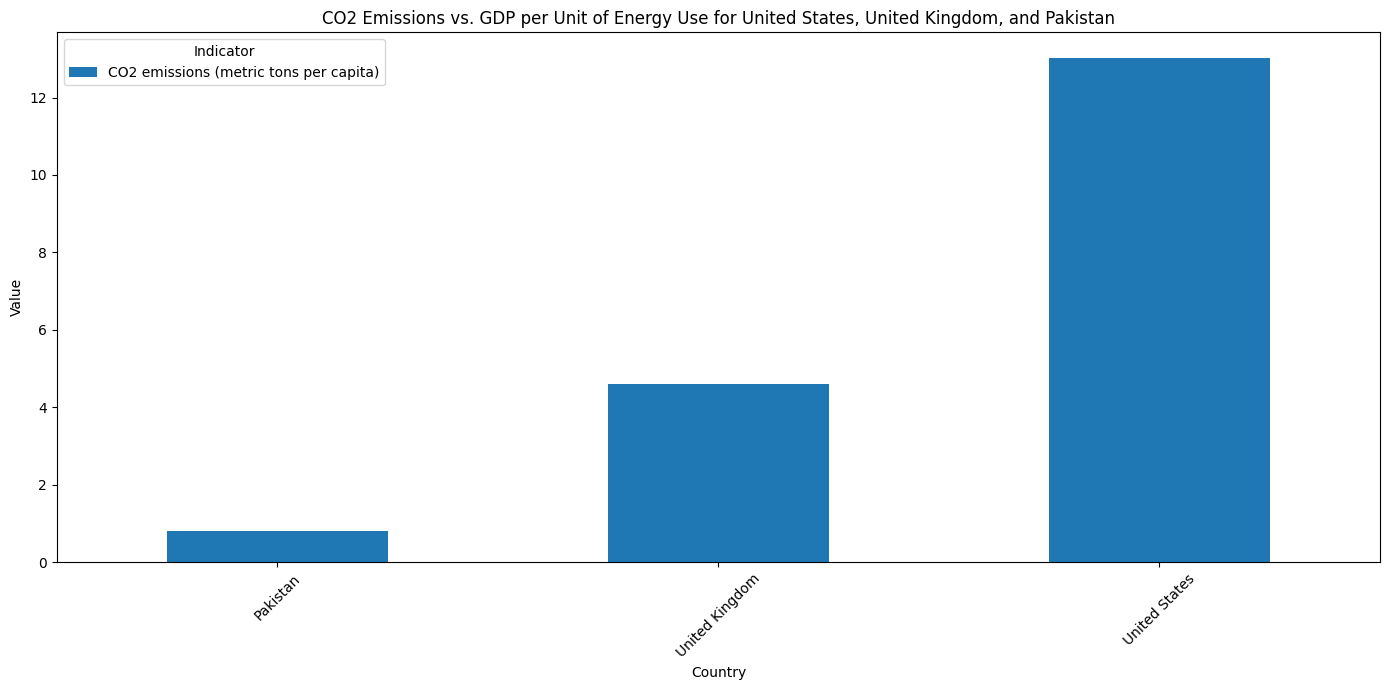

In [39]:
# Extracting the most recent values for CO2 emissions and GDP per unit of energy use
co2_gdp_values = filtered_data[filtered_data['Indicator Name'].isin(['CO2 emissions (metric tons per capita)', 'GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)'])]
co2_gdp_values = co2_gdp_values.pivot(index='Country Name', columns='Indicator Name', values=latest_year)

# Plotting the bar chart for CO2 emissions and GDP per unit of energy use
co2_gdp_values.plot(kind='bar', figsize=(14, 7))
plt.title('CO2 Emissions vs. GDP per Unit of Energy Use for United States, United Kingdom, and Pakistan')
plt.ylabel('Value')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Indicator')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8020\3244515931.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


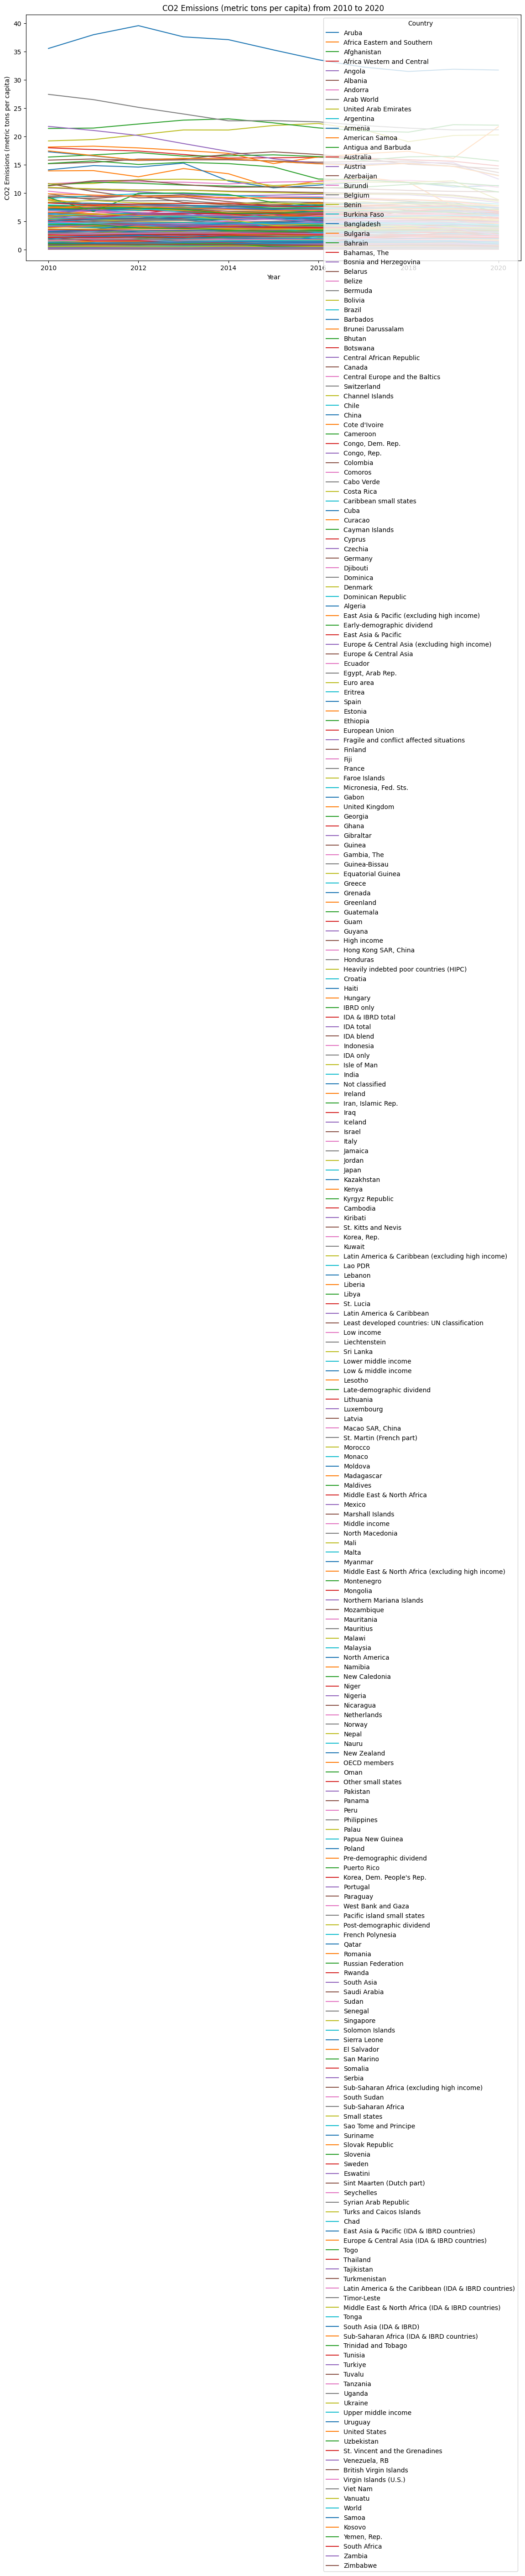

In [40]:
# Extracting the data for CO2 emissions from 2010 to 2020
co2_data = data[data['Indicator Name'] == 'CO2 emissions (metric tons per capita)']
co2_data = co2_data.set_index('Country Name')
co2_data = co2_data.loc[:, '2010':'2020']

# Plotting the line chart for CO2 emissions from 2010 to 2020
co2_data.T.plot(figsize=(14, 7))
plt.title('CO2 Emissions (metric tons per capita) from 2010 to 2020')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

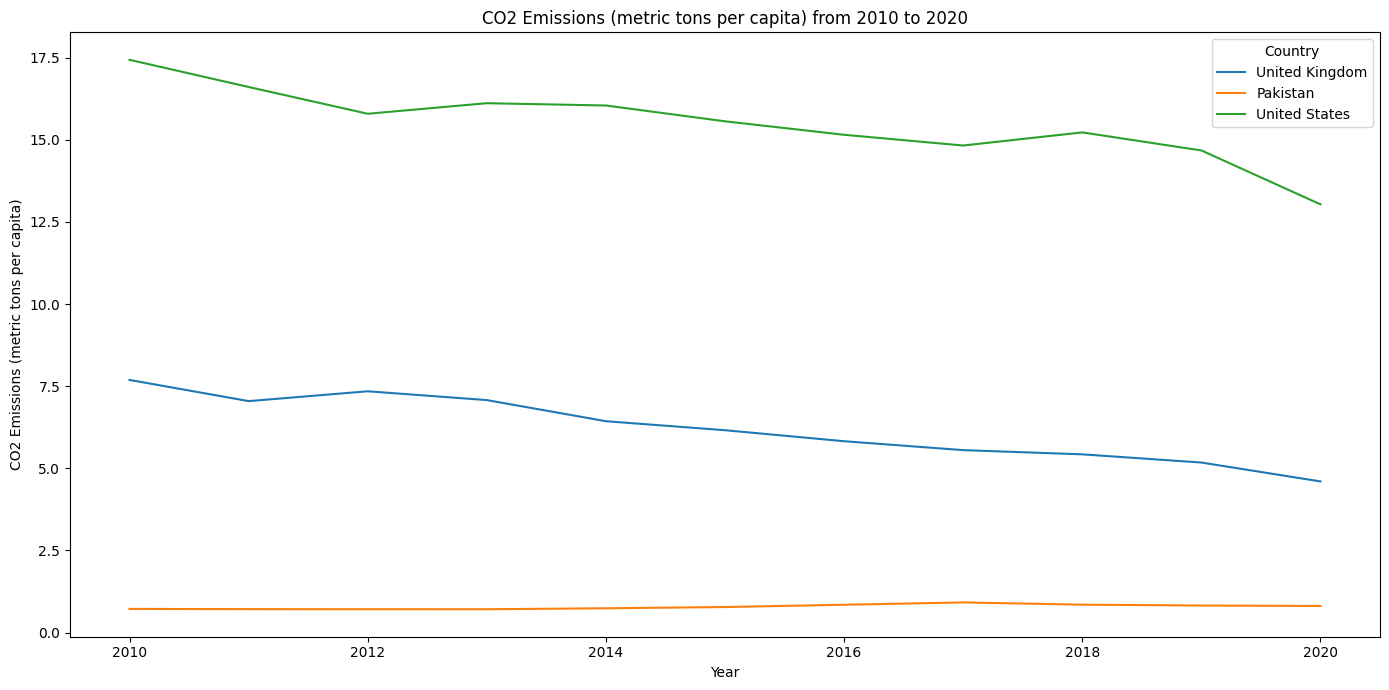

In [41]:
# Extracting the data for CO2 emissions for the three countries from 2010 to 2020
co2_data = filtered_data[filtered_data['Indicator Name'] == 'CO2 emissions (metric tons per capita)']
co2_data = co2_data[['Country Name', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
co2_data.set_index('Country Name', inplace=True)

# Plotting the line chart for CO2 emissions from 2010 to 2020
co2_data.T.plot(figsize=(14, 7))
plt.title('CO2 Emissions (metric tons per capita) from 2010 to 2020')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

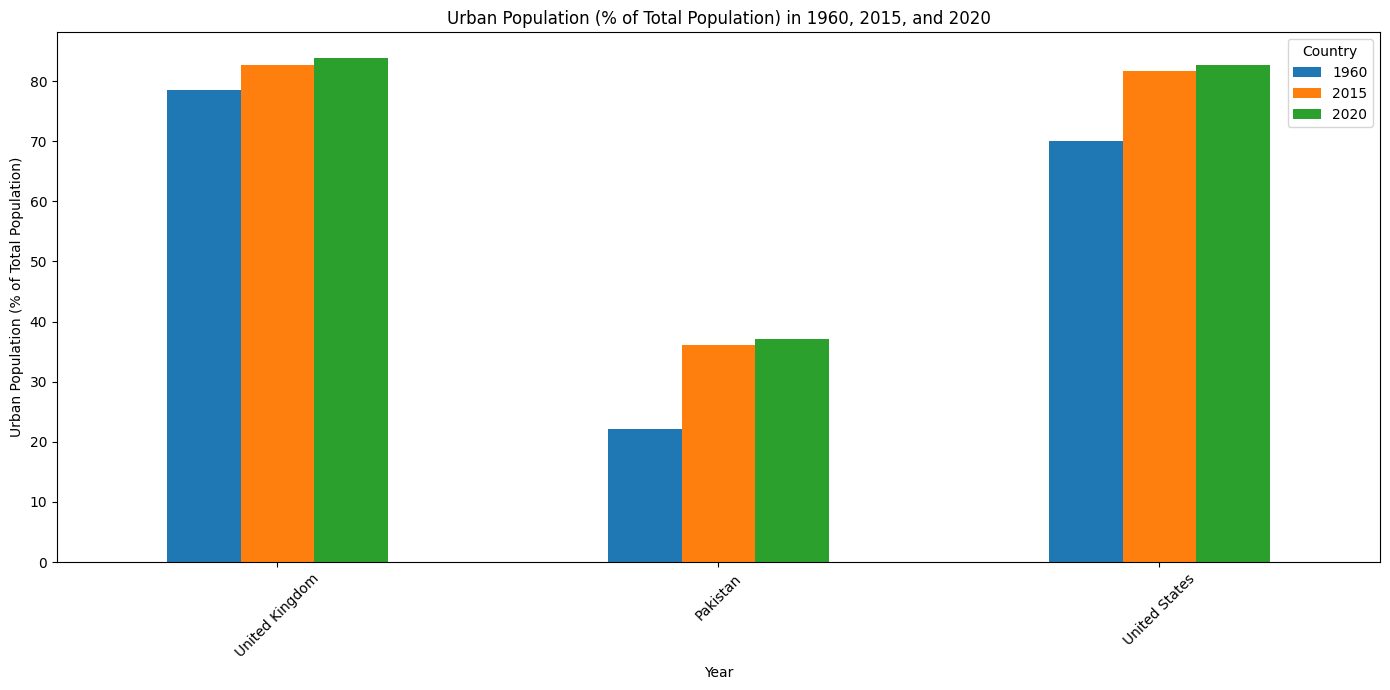

In [42]:
# Extracting the data for urban population for the three countries in 1960, 2015, and 2020
urban_population_data = filtered_data[filtered_data['Indicator Name'] == 'Urban population (% of total population)']
urban_population_data = urban_population_data[urban_population_data['Country Name'].isin(['United States', 'United Kingdom', 'Pakistan'])]
urban_population_data = urban_population_data[['Country Name', '1960', '2015', '2020']]
urban_population_data.set_index('Country Name', inplace=True)

# Plotting the clustered bar chart for urban population
urban_population_data.plot(kind='bar', figsize=(14, 7))
plt.title('Urban Population (% of Total Population) in 1960, 2015, and 2020')
plt.xlabel('Year')
plt.ylabel('Urban Population (% of Total Population)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

In [43]:
# Extracting the data for CO2 emissions for the top 10 countries in 2020
co2_top_10 = data[data['Indicator Name'] == 'CO2 emissions (metric tons per capita)']
co2_top_10 = co2_top_10[['Country Name', '2020']]
co2_top_10 = co2_top_10.sort_values(by='2020', ascending=False).head(10)
co2_top_10

,Country Name,2020
15241,Qatar,31.726842
1713,Bahrain,21.976908
2397,Brunei Darussalam,21.705812
9693,Kuwait,21.169610
649,United Arab Emirates,20.252272
13873,Oman,15.636201
1029,Australia,14.772658
15621,Saudi Arabia,14.266585
2701,Canada,13.599375
12961,North America,13.088837


In [47]:
# Filtering the data for the United States and the indicators of interest
us_data = data[data['Country Name'] == 'United States']

In [49]:
import seaborn as sns

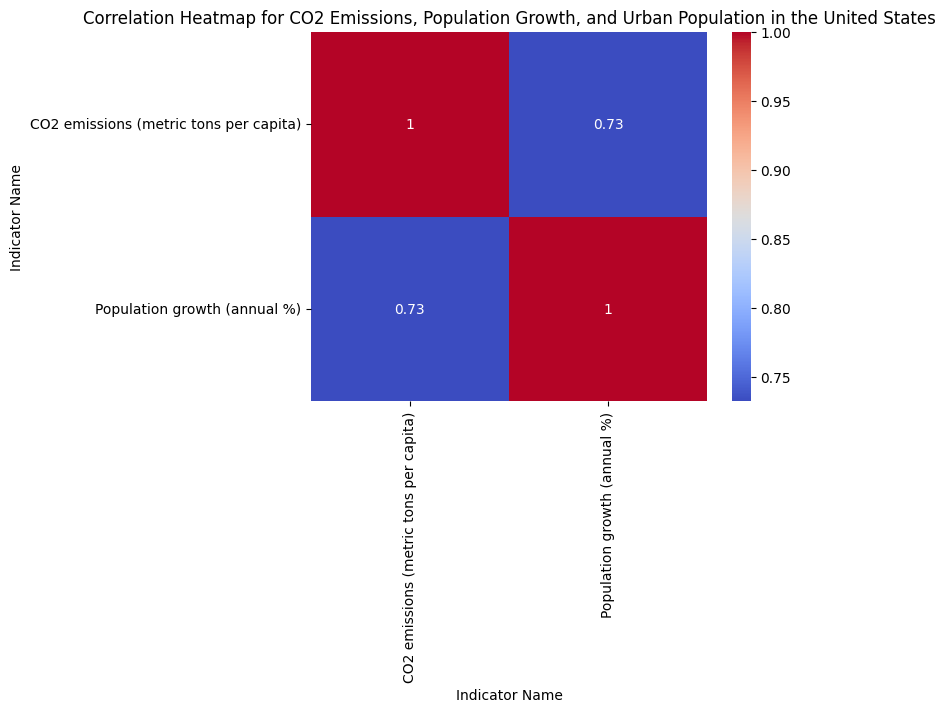

In [50]:
# Reshaping the data to have 'Year' as a column
years = us_data.columns[4:-1]
us_data_melted = us_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                               value_vars=years,
                               var_name='Year',
                               value_name='Value')

# Now we filter the melted data for the indicators of interest
indicators = ['CO2 emissions (metric tons per capita)', 'Population growth (annual %)', 'Urban population (% of total)']
us_data_filtered = us_data_melted[us_data_melted['Indicator Name'].isin(indicators)]

# Pivoting the filtered data
us_pivot = us_data_filtered.pivot(index='Year', columns='Indicator Name', values='Value')

# Calculating the correlation matrix for the selected indicators
us_correlation_matrix = us_pivot.corr()

# Plotting the heatmap
sns.heatmap(us_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for CO2 Emissions, Population Growth, and Urban Population in the United States')
plt.show()

In [51]:
# Correcting the indicator name and including 'Urban population (% of total population)' in the analysis
us_data_filtered_corrected = us_data_melted[us_data_melted['Indicator Name'].isin(['CO2 emissions (metric tons per capita)', 'Population growth (annual %)', 'Urban population (% of total population)'])]

# Pivoting the corrected data
us_pivot_corrected = us_data_filtered_corrected.pivot(index='Year', columns='Indicator Name', values='Value')

# Calculating the correlation matrix for the corrected indicators
us_correlation_matrix_corrected = us_pivot_corrected.corr()

# Displaying the corrected correlation matrix
us_correlation_matrix_corrected

Indicator Name,CO2 emissions (metric tons per capita),Population growth (annual %),Urban population (% of total population)
Indicator Name,,,
CO2 emissions (metric tons per capita),1.000000,0.732299,-0.763620
Population growth (annual %),0.732299,1.000000,-0.684044
Urban population (% of total population),-0.763620,-0.684044,1.000000


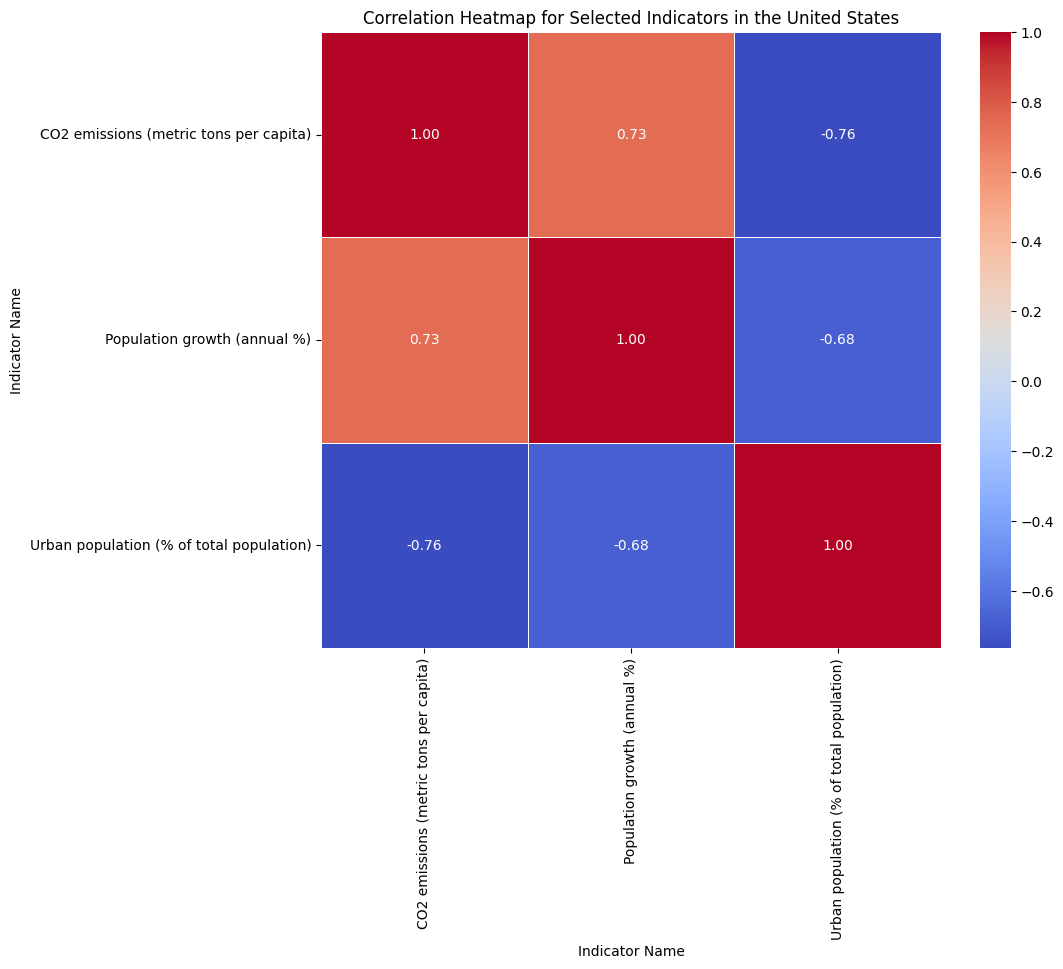

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the corrected correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(us_correlation_matrix_corrected, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Selected Indicators in the United States')
plt.show()


In [56]:
# Searching for specific terms within the 'Indicator Name' column
df_arable = df[df['Indicator Name'].str.contains('Arable land \(% of land area\)', case=False, na=False)]
df_forest = df[df['Indicator Name'].str.contains('Forest area \(% of land area\)', case=False, na=False)]

# Print out the full names of the matching indicators for arable land and forest area
print('Arable land indicators:')
print(df_arable['Indicator Name'].unique())
print('\nForest area indicators:')
print(df_forest['Indicator Name'].unique())

Arable land indicators:
['Arable land (% of land area)']

Forest area indicators:
['Forest area (% of land area)']


In [55]:
file_path = 'C:/Users/user/Downloads/API_19_DS2_en_csv_v2_6183479.csv'
df = pd.read_csv(file_path, skiprows=4)

# Display the head of the dataframe to inspect the column names
print(df.head())

  Country Name Country Code                            Indicator Name   
0        Aruba          ABW  Urban population (% of total population)  \
1        Aruba          ABW                          Urban population   
2        Aruba          ABW        Urban population growth (annual %)   
3        Aruba          ABW                         Population, total   
4        Aruba          ABW              Population growth (annual %)   

      Indicator Code       1960          1961          1962          1963   
0  SP.URB.TOTL.IN.ZS     50.776     50.761000     50.746000     50.730000  \
1        SP.URB.TOTL  27728.000  28330.000000  28764.000000  29157.000000   
2        SP.URB.GROW        NaN      2.147858      1.520329      1.357042   
3        SP.POP.TOTL  54608.000  55811.000000  56682.000000  57475.000000   
4        SP.POP.GROW        NaN      2.179059      1.548572      1.389337   

           1964          1965  ...           2014           2015   
0     50.715000     50.700000 

In [57]:
# Searching for specific terms within the 'Indicator Name' column
df_arable = df[df['Indicator Name'].str.contains('Arable land \(% of land area\)', case=False, na=False)]
df_forest = df[df['Indicator Name'].str.contains('Forest area \(% of land area\)', case=False, na=False)]

# Print out the full names of the matching indicators for arable land and forest area
print('Arable land indicators:')
print(df_arable['Indicator Name'].unique())
print('\nForest area indicators:')
print(df_forest['Indicator Name'].unique())

Arable land indicators:
['Arable land (% of land area)']

Forest area indicators:
['Forest area (% of land area)']


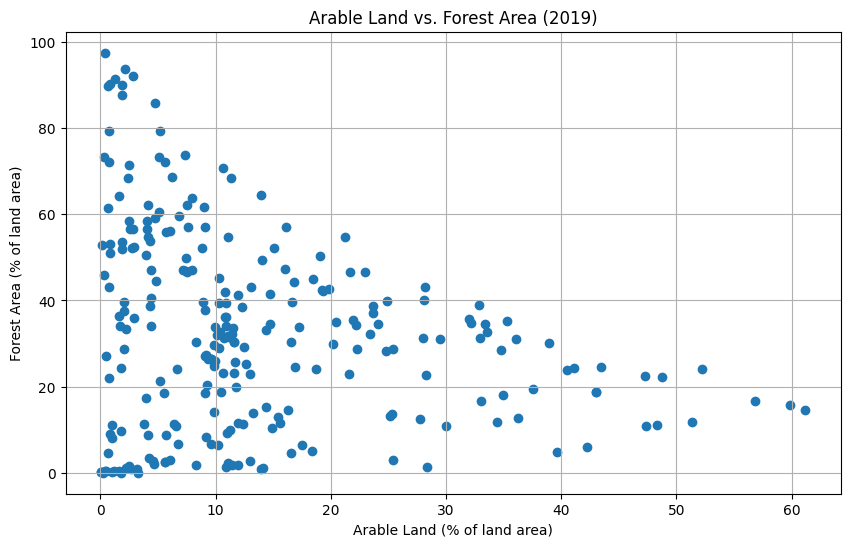

In [58]:
import matplotlib.pyplot as plt

# Filter the dataframe for the arable land and forest area indicators
arable_land_data = df[df['Indicator Name'] == 'Arable land (% of land area)']
forest_area_data = df[df['Indicator Name'] == 'Forest area (% of land area)']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(arable_land_data['2019'], forest_area_data['2019'])
plt.title('Arable Land vs. Forest Area (2019)')
plt.xlabel('Arable Land (% of land area)')
plt.ylabel('Forest Area (% of land area)')
plt.grid(True)
plt.show()